<a href="https://colab.research.google.com/github/Harpreetk01/TechnologyCompanies_Layoffs2023_EDA/blob/main/TechnologyCompanies_Layoffs2023_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


##**Importing the required libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('/content/drive/MyDrive/DA Datasets/tech_layoffs.csv')

In [6]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [7]:
data.tail()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN
488,Blueboard,Unclear,Unclear,11/3/2022,Enterprise Software,San Francisco,LinkedIn reports,Private,NaN


##**Data Preparation & Cleaning**

1. Load the file using pandas
2. Look at some infromation about the data & the columns
3. Fix any missing or incorrect values

In [8]:
data.shape

(489, 9)

In [9]:
data.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

In [10]:
data.describe()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,DataRobot,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,"Per Axios, 22 of the employees laid off were f..."
freq,2,182,133,12,24,136,52,370,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


###**Changing the DataTypes of columns**

In [13]:
data['ReportDate'] = pd.to_datetime(data['reported_date'])

In [14]:
#Seperating the month, year 
data['Month'] = data['ReportDate'].dt.month
data['Year'] = pd.to_datetime(data['ReportDate']).dt.strftime('%Y')

In [15]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,ReportDate,Month,Year
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,2022-12-09,12,2022
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN,2022-09-19,9,2022
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,2022-08-20,8,2022
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,2023-01-18,1,2023
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",2022-05-13,5,2022


In [16]:
#Replacing string data into numeric data
data['total_layoffs'] = data['total_layoffs'].str.replace('Unclear', "0")
data['impacted_workforce_percentage'] = data['impacted_workforce_percentage'].str.replace('Unclear', '0')

In [17]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,ReportDate,Month,Year
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,2022-12-09,12,2022
1,VideoAmp,0,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN,2022-09-19,9,2022
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,2022-08-20,8,2022
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,2023-01-18,1,2023
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",2022-05-13,5,2022


In [18]:
#Changing the data type 
data[['total_layoffs','impacted_workforce_percentage']] = data[['total_layoffs','impacted_workforce_percentage']].astype('float')
data['Year'] = data['Year'].astype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    float64       
 2   impacted_workforce_percentage  489 non-null    float64       
 3   reported_date                  489 non-null    object        
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
 8   additional_notes               22 non-null     object        
 9   ReportDate                     489 non-null    datetime64[ns]
 10  Month                          489 non-null    int64         
 11  Year               

In [20]:
#Checking the null values in the columns
data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
ReportDate                         0
Month                              0
Year                               0
dtype: int64

In [21]:
#Removing Unnecessary columns
data.drop(['additional_notes'], axis = 1, inplace = True)
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,ReportDate,Month,Year
0,C2FO,20.0,2.0,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,2022
1,VideoAmp,0.0,2.0,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,2022-09-19,9,2022
2,Amperity,13.0,3.0,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20.0,3.0,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24.0,3.0,5/13/2022,Health Care,New York,Axios,Private,2022-05-13,5,2022


In [22]:
data.isnull().sum()

company                          0
total_layoffs                    0
impacted_workforce_percentage    0
reported_date                    0
industry                         0
headquarter_location             0
sources                          0
status                           0
ReportDate                       0
Month                            0
Year                             0
dtype: int64

##**Data Visulaisation**

###**Top 10 layoffs Companies**

In [23]:
top10_layoff_companies = data.groupby('company').sum()['total_layoffs'].sort_values(ascending = False).reset_index().head(10)

In [24]:
top10_layoff_companies

,company,total_layoffs
0,Amazon,18000.0
1,Alphabet,12000.0
2,Meta,11000.0
3,Microsoft,10000.0
4,Salesforce,9090.0
5,Better.com,5000.0
6,Cisco,4100.0
7,Peloton,4084.0
8,Carvana,4000.0
9,Twitter,3740.0


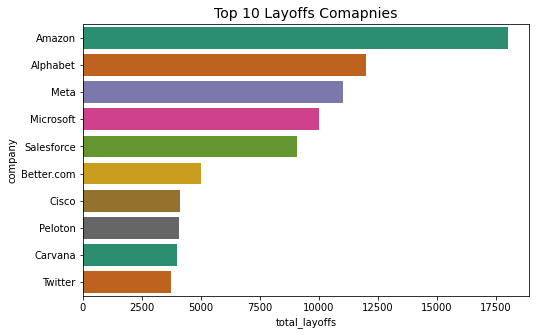

In [43]:
plt.figure(figsize = (8,5))
sns.barplot(data = data, y = top10_layoff_companies['company'], x = top10_layoff_companies['total_layoffs'], palette = 'Dark2')
plt.title('Top 10 Layoffs Comapnies', fontsize = 14)
plt.show()

| According to the graph, Amazon, Alphabet, Meta, Microsoft, and Salesforce are the top 5 companies that lay off more than 10,000 employees and below are the other 5 companies that lay off fewer than 10,000

###**Status Wise Layoffs**

In [35]:
status_wiselayoffs = data.groupby(['status', 'Year'])['total_layoffs'].count().reset_index()
status_wiselayoffs

,status,Year,total_layoffs
0,Private,2022,323
1,Private,2023,47
2,Public,2022,85
3,Public,2023,34


| During the covid time period in 2020, the private sector had more layoffs (332), whereas the public sector had only (85) layoffs, which is less than 100, which is very few in comparison to the private sector.

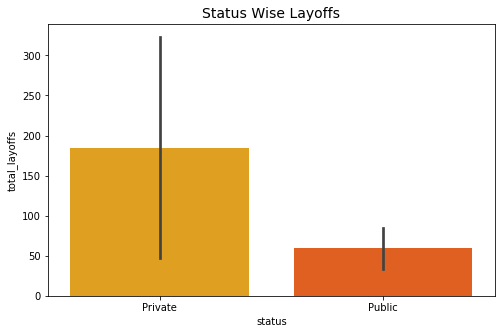

In [42]:
plt.figure(figsize = (8,5))
sns.barplot(x = status_wiselayoffs['status'], y = status_wiselayoffs['total_layoffs'], palette = 'autumn_r')
plt.title("Status Wise Layoffs", fontsize = 14)
plt.show()

###**Year wise layoffs**

In [52]:
#Year wise layoffs
yearwise_layoffs = data.groupby('Year')['total_layoffs'].count().reset_index()

In [53]:
yearwise_layoffs

,Year,total_layoffs
0,2022,408
1,2023,81


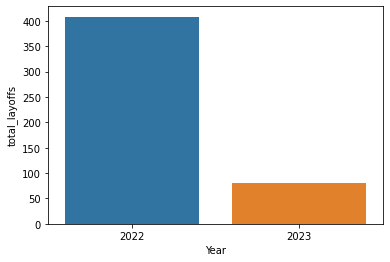

In [54]:
sns.barplot(x = yearwise_layoffs['Year'], y = yearwise_layoffs['total_layoffs'], data = data)
plt.show()

###**Top 10 layoff Industries**

In [55]:
top10_layoffs_industry = data.groupby('industry')['total_layoffs'].sum().sort_values(ascending = False).head(10).reset_index()

In [56]:
top10_layoffs_industry

,industry,total_layoffs
0,"E-commerce, SaaS",18000.0
1,Social media,12420.0
2,"Big tech, internet services",12000.0
3,Enterprise Software,10945.0
4,Fintech,9811.0
5,"enterprise tech, analytics",9090.0
6,Fitness,4486.0
7,"enterprise software, SaaS",4100.0
8,"Automotive, Ecommerce",4000.0
9,Social Media,3805.0


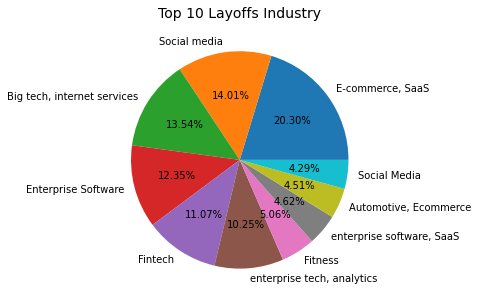

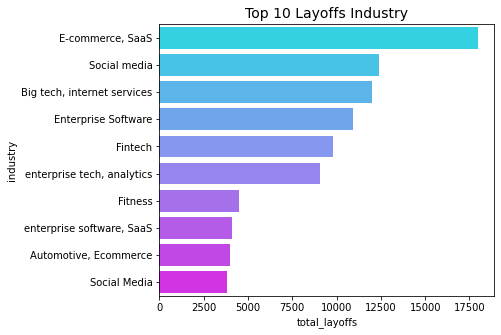

In [58]:
plt.figure(figsize = (10,5))
plt.pie(top10_layoffs_industry['total_layoffs'], labels = top10_layoffs_industry['industry'], autopct = '%.2f%%')
plt.title('Top 10 Layoffs Industry', fontsize = 14)
plt.show()


plt.figure(figsize = (6,5))
sns.barplot(data = data, x = top10_layoffs_industry['total_layoffs'], y = top10_layoffs_industry['industry'], palette='cool')
plt.title('Top 10 Layoffs Industry', fontsize = 14)
plt.show()

###**Top 5 Layoffs Locations**

In [59]:
layoffs_locations = data.groupby('headquarter_location')['total_layoffs'].sum().sort_values(ascending = False).reset_index().head()
layoffs_locations

,headquarter_location,total_layoffs
0,San Francisco,30745.0
1,Seattle,30477.0
2,New York,15583.0
3,"Mountain View, CA",12147.0
4,"Menlo Park, CA",11000.0


In [60]:
layoffslocations = data.groupby(['headquarter_location', 'Year'])['total_layoffs'].count().sort_values(ascending = False).reset_index().head(30)
layoffslocations

,headquarter_location,Year,total_layoffs
0,San Francisco,2022,116
1,New York,2022,66
2,San Francisco,2023,20
3,Seattle,2022,18
4,Los Angeles,2022,18
5,Chicago,2022,12
6,Boston,2022,12
7,New York,2023,11
8,Mountain View,2022,4
9,Palo Alto,2022,4


| Location of layoffs by year : So according to the graph, San Francisco is the top 2022 layoff location with 116 and New York has 66. layoffs,whereas San Francisco will also be in the top spot in 2023, with very few layoffs in all other locations.

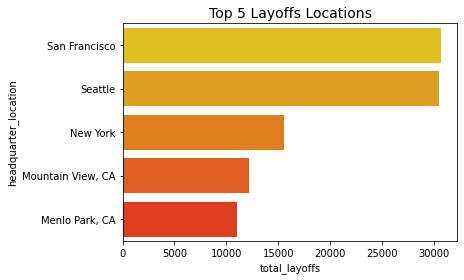

In [62]:
sns.barplot(data = data, x = layoffs_locations['total_layoffs'], y = layoffs_locations['headquarter_location'], palette='autumn_r')
plt.title('Top 5 Layoffs Locations', fontsize = 14)
plt.show()

In [63]:
data.describe()

,total_layoffs,impacted_workforce_percentage,Month,Year
count,489.000000,489.000000,489.000000,489.000000
mean,282.527607,17.382413,7.237219,2022.165644
std,1326.256662,23.682648,3.589169,0.372142
min,0.000000,0.000000,1.000000,2022.000000
25%,0.000000,0.000000,5.000000,2022.000000
50%,40.000000,10.000000,8.000000,2022.000000
75%,120.000000,20.000000,11.000000,2022.000000
max,18000.000000,100.000000,12.000000,2023.000000


In [64]:
data.groupby(['company', 'headquarter_location', 'Year'])['total_layoffs'].count().sort_values(ascending = False).reset_index().head(20)

,company,headquarter_location,Year,total_layoffs
0,On Deck,San Francisco,2022,2
1,Argo AI,Pittsburgh,2022,2
2,Sundae,San Francisco,2022,2
3,DataRobot,Boston,2022,2
4,Skillz,San Francisco,2022,2
5,Gemini,New York,2022,2
6,Postscript,San Francisco,2022,1
7,Polly,"Williston, VT",2022,1
8,Policygenius,New York,2022,1
9,Pluralsight,"Draper, UT",2022,1


In [65]:
data.groupby(['status', 'Month', 'Year'])['total_layoffs'].count()

status   Month  Year
Private  1      2023    47
         2      2022     2
         3      2022     4
         4      2022     9
         5      2022    24
         6      2022    52
         7      2022    49
         8      2022    34
         9      2022    26
         10     2022    34
         11     2022    56
         12     2022    33
Public   1      2022     1
                2023    34
         3      2022     1
         4      2022     1
         5      2022     5
         6      2022     5
         7      2022     6
         8      2022    18
         9      2022     7
         10     2022     6
         11     2022    19
         12     2022    16
Name: total_layoffs, dtype: int64

###**Month Wise Layoffs in Different Sector**

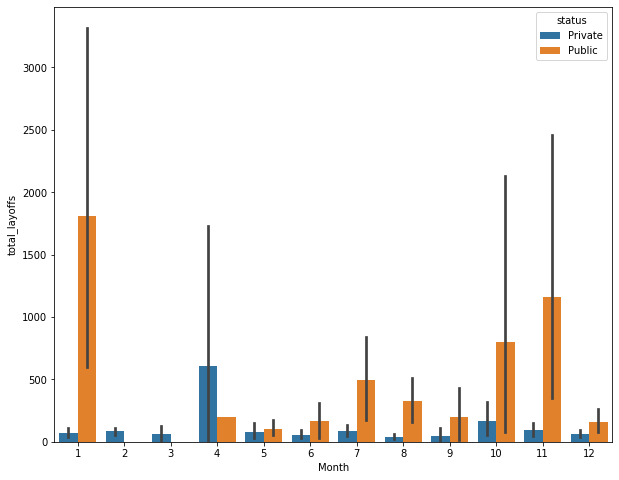

In [67]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Month', y = 'total_layoffs', data = data, hue = 'status')
plt.show()